In [51]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [52]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


DATA ANALYSIS AND VISUALIZATION


In [53]:
df.shape

(200, 5)

In [54]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'Gender wise distribution')

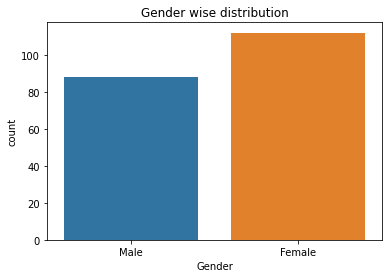

In [56]:
sns.countplot("Gender",data = df)
plt.title("Gender wise distribution")

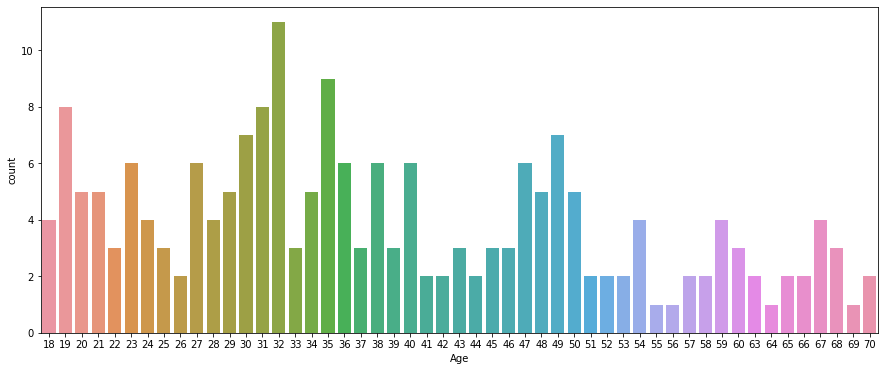

In [57]:
plt.figure(figsize = (15,6))
sns.countplot("Age", data = df)

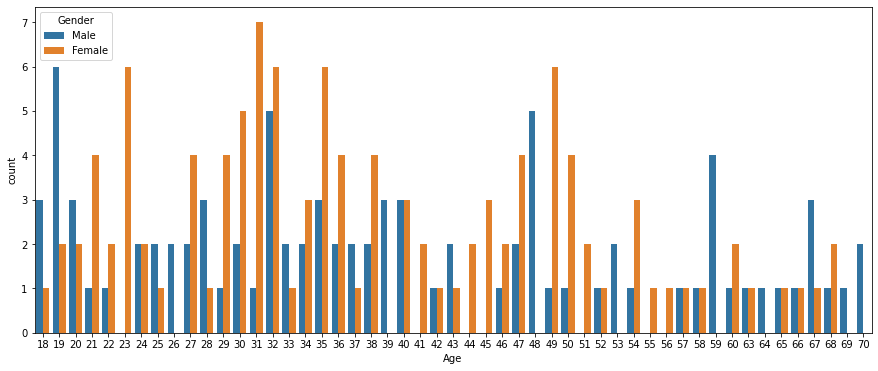

In [58]:
plt.figure(figsize = (15,6))
sns.countplot("Age", hue = "Gender",data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

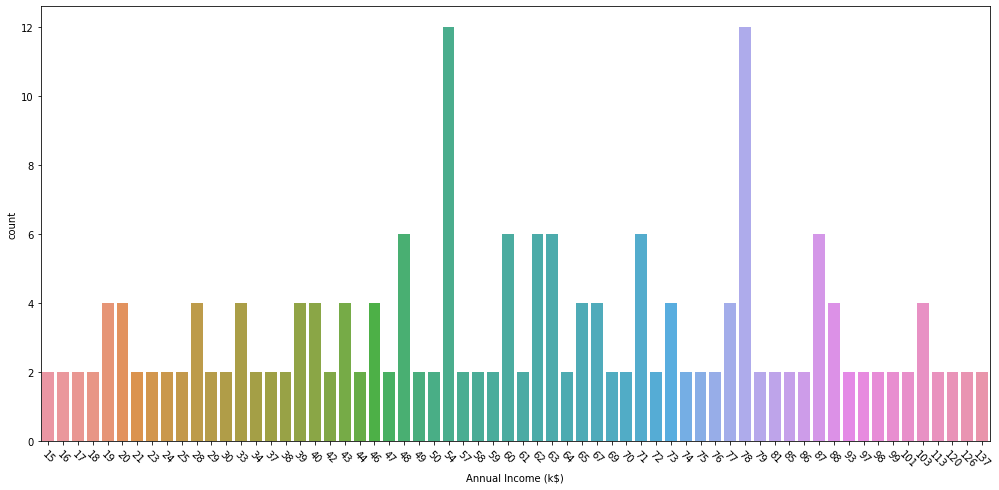

In [59]:
plt.figure(figsize = (17,8))
sns.countplot("Annual Income (k$)",data = df)
plt.xticks(rotation = -45)

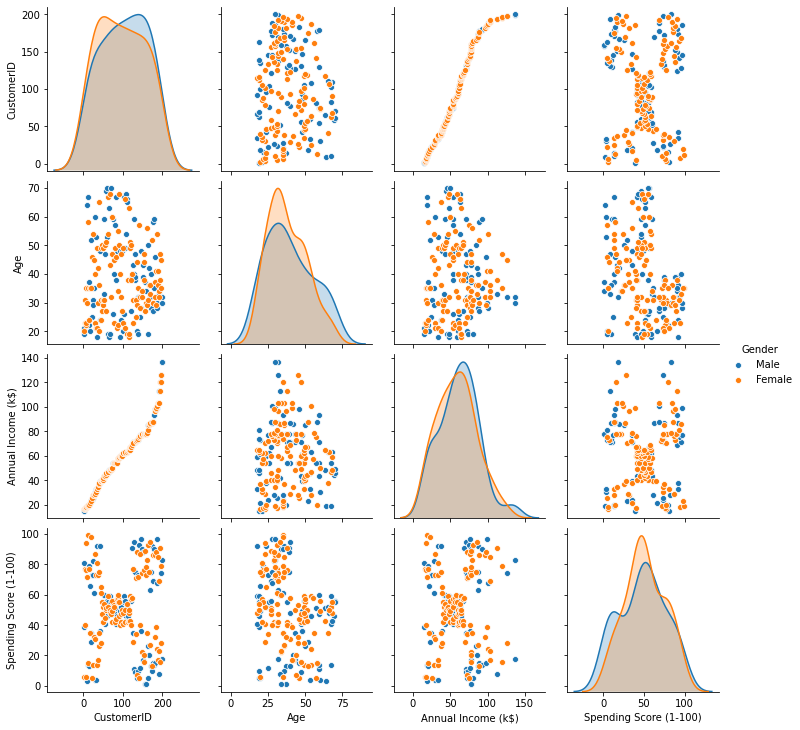

In [60]:
sns.pairplot(df,hue = "Gender")

In [68]:
df1 = df.drop(df[["CustomerID","Gender"]],axis = 1)
df1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [69]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(df1)
    clusters.append(km.inertia_)
clusters

[308812.78,
 212840.16982097185,
 143342.751571706,
 104386.17701773129,
 75363.74835182933,
 58300.44332159069,
 51118.949931647294,
 44342.3173934174,
 40909.528380387725,
 37547.29916871746]

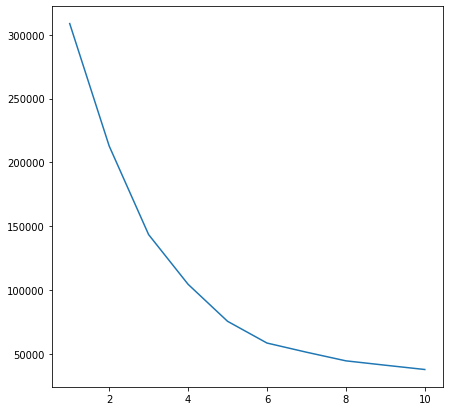

In [74]:
plt.figure(figsize = (7,7))
sns.lineplot(x = list(range(1,11)),y = clusters)